# Snooker Player Status

I am an amateur player snooker player, had intentions like most to be a professional in my younger days. The game still fascinates me like it did, the first time I went into a club. Many men and women play sports at an amateur and have tried to become professional in preparation and technique. There is much more information now where is helping people to understand how a professional prepares. 

I have always wondered what the relationship is with the data I have chosen, and I am going to investigate the main factors that can contribute to your status. Not like golf, where is the handicap system for players where an amateur can aim to be a scratch player meaning they could compete professionally, snooker still hasn't developed this system.

Variables used:

players - which is the number of players for the dataset. 

##### gender - 
If the player is male or female. Not like many other sports men and women can compete in the same the tournaments. 4 women have competed on the main snooker tour since its existence, so this shows there is a big disparity in participation.

###### practice - 

For setting the range for the practice variable, I took the benchmark as 4 time world champion Mark Selby. He is a full time professional, who plays 6 hours a day. From my own knowledge that is more than likey correct and the professionals, take one day off. 36 hours a week and take approximately 4 weeks off. So the total practice time for professional is approximately 1728 hours per year. So as an amateur, I would set the maximum time to practice as 24 hours overall for a semi-professional or amateur player.

In the dataframe, the hours are based over 2 seasons and I have set the limits for the conditions based off a ratio in quarters and my own knowlegde. To be a professional you would need to be doing at least 3/4 of the time what I researched. There may be some amatuers getting near the hour limit but you also need some talent.

##### comp_match_wins - 

How many wins the player had in competitve tournament wins on national tour or main tour, for a season. The range for this is set in a two season period, you can qualify through to the main tour in many ways. In order to play in any of the events to qualify on the main tour, you would need to be the number one player in your country playing the national amateur events, so you would have to have won the most matches in that year. 

Anybody new on the professional tour would have had to had qualified through the same path. Hence I am doing 2 seasons as the wins for the previous year and wins on the main tour would have to be counted for a fair reflection. There is no true amount of wins on the professional, as the rankings are based on prize money, you want to win at least 10 matches to have a chance of staying on the main tour each season. The last full season where a player qualified as professional they had to win 14 matches. 

##### comp_centuries - 

This is how many centuries a player had in competitive tournaments overall. What this means is you accumulated 100 points or more in one visit. So you scored 100 points consecutively. 75 players who have played professionally, have scored over a 100 centuries since they were recorded.The level of skill and difficultly can be measured against how many people play around the world. I found an article that referenced 60 million play in China at least. Based off this I weighted the amount for different categories.

The highest amount recorded to date by a single player is almost 1200, which 300 ahead of anybody else.

##### status - 

This is if the player is professional, semi professional or an amateur. Based off the variables I will calculate for the dataset. 


### Setting up the dataframe

In [14]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# setting up the dataframe with columns
df = pd.DataFrame(columns=['players','gender','practice','comp_match_wins',
                           'comp_cen_class','status'])

# setting the players to 100
df['players'] = pd.Series(range(1,101))

# set choices and randomly assign male or female
gender = ['M','F']
df['gender'] = np.random.choice(gender,100, p=[0.95,0.05])

# random assign practice hours to each player
df['practice'] = np.random.randint(0, 3456, 100)

# randomly assign match wins to players
df['comp_match_wins'] = np.random.randint(0, 84, 100)

#randomly assign centuries to players
# lvl 1 is > 100, lv2 < 100
comp_cen_class = ['lvl1','lvl2']
df['comp_cen_class'] = np.random.choice(comp_cen_class,p=[0.05,0.95])

# setting conditions for status

cond_stat = [
    (df['practice'] > 2500) & (df['comp_match_wins']>32),
    (df['practice'] > 2500) & (df['comp_match_wins']<=32) | (df['comp_cen_class'] == 'lvl1'),
    (df['practice'] < 2500) | (df['comp_match_wins']<=32)
    ]


# Values to be assigned based on conditions
val_stat = ['pro','semipro','ama']

df['status'] = np.select(cond_stat, val_stat)


In [15]:
pd.set_option('display.max_rows', 100)

print (df)

    players gender  practice  comp_match_wins comp_cen_class   status
0         1      M      2551               16           lvl2  semipro
1         2      M      3103               16           lvl2  semipro
2         3      M       475               14           lvl2      ama
3         4      M      2132               71           lvl2      ama
4         5      M      1971               33           lvl2      ama
5         6      M      1788               15           lvl2      ama
6         7      M       640                1           lvl2      ama
7         8      M       434               27           lvl2      ama
8         9      M       966               77           lvl2      ama
9        10      M      1282               73           lvl2      ama
10       11      M      1695               26           lvl2      ama
11       12      M       588               70           lvl2      ama
12       13      M       923               81           lvl2      ama
13       14      M  

In [16]:
# print head to check data
df.head()

,players,gender,practice,comp_match_wins,comp_cen_class,status
0,1,M,2551,16,lvl2,semipro
1,2,M,3103,16,lvl2,semipro
2,3,M,475,14,lvl2,ama
3,4,M,2132,71,lvl2,ama
4,5,M,1971,33,lvl2,ama


In [17]:
# check the datatypes
df.dtypes

players             int64
gender             object
practice            int32
comp_match_wins     int32
comp_cen_class     object
status             object
dtype: object

In [26]:
# count the number each statuses
df.value_counts("status")

status
ama        70
pro        16
semipro    14
dtype: int64

In [18]:
# show that the columns are contributing to the status types
pd.unique(df['status'])

array(['semipro', 'ama', 'pro'], dtype=object)

#### Show the status count

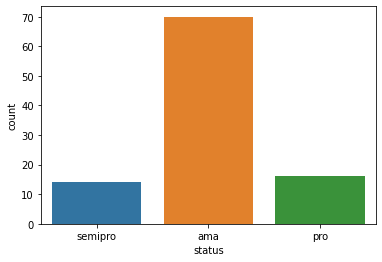

In [19]:
import seaborn as sns

sns.countplot(x='status', data=df, )
plt.show()

The graph shows that the highest status from this group of players is amateurs. This makes sense as it is a high amount of wins to become a professional. Being a semi-pro is a difficult life as you need to be winning alot, so you don't require a part-time job.

C:\Users\james\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


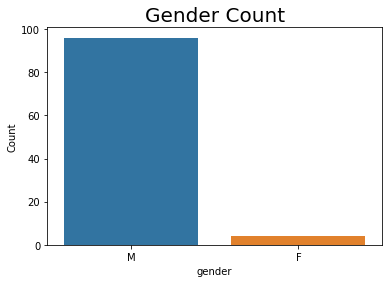

In [20]:
# Show the disparity between Male abd Female player

gen_count = sns.countplot('gender', data=df)
gen_count.axes.set_title('Gender Count',fontsize=20)
gen_count.set_ylabel("Count",fontsize=10)
plt.show()

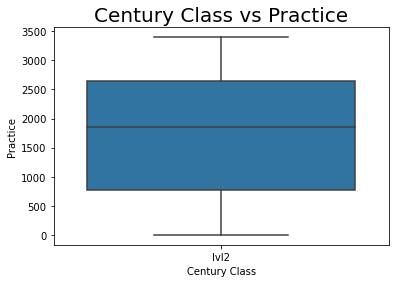

In [21]:
# Showing the difficuly of how hard it is to make 100> centuries

cen_comp = sns.boxplot(x='comp_cen_class', y='practice', data=df)
cen_comp.axes.set_title('Century Class vs Practice', fontsize = 20)
cen_comp.set_xlabel('Century Class', fontsize = 10)
cen_comp.set_ylabel('Practice', fontsize = 10)
plt.show()

From this graph you can see the range of practice hours that the players are doing. Nobody in the dataset is the class of level 1 but you can see the difficulty based on the higher amount of hours being done certain players.

### Scatter plot for status vs wins

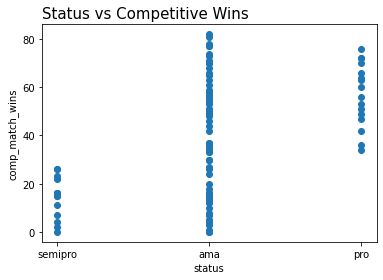

In [27]:
plt.scatter(df["status"], df["comp_match_wins"])
plt.title("Status vs Competitive Wins", loc ="left", fontsize=15)
plt.xlabel("status")
plt.ylabel("comp_match_wins")

plt.show()

### Scatter plot for status vs practice

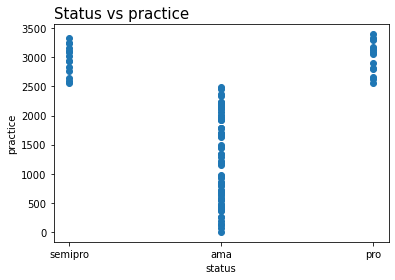

In [31]:
plt.scatter(df["status"], df["practice"])
plt.title("Status vs practice", loc ="left", fontsize=15)
plt.xlabel("status")
plt.ylabel("practice")

plt.show()

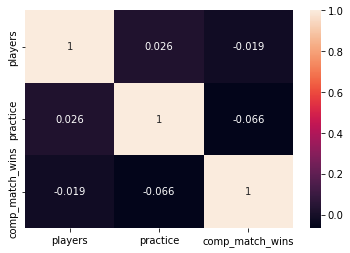

In [32]:
# Create the heatmap, annot = true is write each data value in the cell.
x = sns.heatmap(df.corr(),annot=True)
plt.plot()
figure = x.get_figure() 
figure.savefig("sns-heatmap.png")
plt.show()

In [23]:
# getting the statistics of matches won which has probably the strongest
# influence on player status
df['comp_match_wins'].describe()

count    100.000000
mean      39.210000
std       24.521397
min        0.000000
25%       16.000000
50%       37.000000
75%       60.250000
max       82.000000
Name: comp_match_wins, dtype: float64